In [15]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data = np.array([i for i in range(1, 51)])

In [3]:
def create_dataset(data, steps=5):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(X), np.array(y)

In [4]:
time_steps = 5
X, y = create_dataset(data, steps=time_steps)


X = X.reshape((X.shape[0], X.shape[1], 1))

In [5]:
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (45, 5, 1)
Output shape: (45,)


In [6]:
model = Sequential()


model.add(SimpleRNN(64, activation='tanh', input_shape=(time_steps, 1)))

model.add(Dense(1))


model.compile(optimizer=Adam(0.01), loss='mse')


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X, y,
    epochs=200,
    batch_size=8,
    verbose=1
)



Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 744.0695
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 581.3906 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 428.6541
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 293.3946
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 224.5422
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 183.3038
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 126.3314
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 94.7700
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 72.1633
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 66.0992 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 47.6977
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 33.5319
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26.8759
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.4953
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.

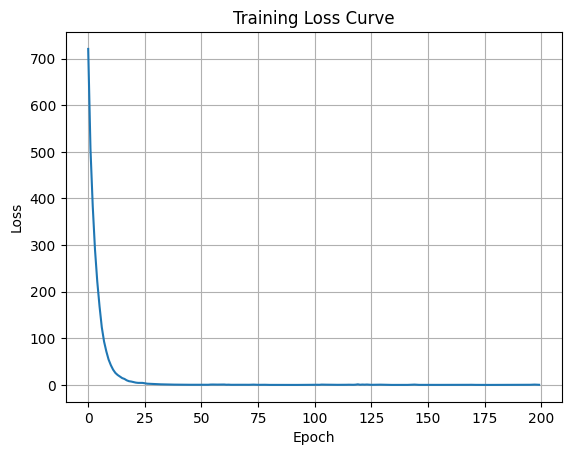

In [8]:
plt.plot(history.history['loss'])
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


In [9]:
test_seq = np.array([46, 47, 48, 49, 50]).reshape(1, time_steps, 1)

prediction = model.predict(test_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [10]:

print("\nInput Sequence: [46, 47, 48, 49, 50]")


Input Sequence: [46, 47, 48, 49, 50]


In [11]:
print("Predicted Next Number:", prediction[0][0])

Predicted Next Number: 49.431686


In [12]:
future_predictions = []
current_seq = np.array([46, 47, 48, 49, 50])

for _ in range(5):
    input_data = current_seq.reshape(1, time_steps, 1)
    next_value = model.predict(input_data)[0][0]
    future_predictions.append(next_value)

    current_seq = np.append(current_seq[1:], next_value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [13]:
print("\nFuture Predictions (5 steps):")




Future Predictions (5 steps):


In [14]:
print(future_predictions)

[np.float32(49.431686), np.float32(49.392143), np.float32(49.36394), np.float32(49.36032), np.float32(49.359406)]
